# Data Wrangling WeRateDogs

**In this project we will wrangle data from this account in twitter @dog_rates, also known as WeRateDogs**

## Gather

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os

### Import Twitter archive

In [71]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Download Image Prediction Data

In [72]:
# import and saving Data programatically 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [73]:
open('image_prediction.tsv','wb').write(response.content)

335079

In [74]:
response

<Response [200]>

In [75]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [76]:
pred = pd.read_csv('image_prediction.tsv',sep='\t')
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API

**In this section, I aleardy download twitter API from Udacity supports material. I will keep the code as a note**

In [77]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
 #consumer_key = 'xxx'
 #consumer_secret = 'xxx'
 #access_token = 'xxx'
 #access_secret = 'xxx'

 #auth = OAuthHandler(consumer_key, consumer_secret)
 #auth.set_access_token(access_token, access_secret)

 #api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
 #tweet_ids = df.tweet_id.values
 #len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
 #count = 0
 #fails_dict = {}
 #start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
 #with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
     #for tweet_id in tweet_ids:
         #count += 1
         #print(str(count) + ": " + str(tweet_id))
         #try:
             #tweet = api.get_status(tweet_id, tweet_mode='extended')
             #print("Success")
             #json.dump(tweet._json, outfile)
             #outfile.write('\n')
         #except tweepy.TweepError as e:
             #print("Fail")
             #fails_dict[tweet_id] = e
             #pass
 #end = timer()
 #print(end - start)
 #print(fails_dict)

In [78]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [79]:
# create a list of data from tweet_json.txt
tweetslist = []
for json_data in tweets:
    tweetslist.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})

# Create dataframe from tweet_json list
df2 = pd.DataFrame(tweetslist ,columns = ['id', 'retweet_count' , 'favorite_count']) 

df2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess

In [80]:
df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [82]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [83]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [84]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [85]:
dfname = df['name']
dfname = list(dict.fromkeys(dfname))
list(dfname)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

In [86]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [87]:
pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [88]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [89]:
pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [90]:
pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [91]:
df2.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [93]:
df2.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### quality issue
1.Remove columns 'in_reply_to_status_id' , in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id and   retweeted_status_timestamp has alot of missing data and not need in our analysis in df.

2.Source Data not clear and long make it shorter and 

3.timestamp has data not necessary +0000 

4.name column have (None,a,all,an,the,by,old,this,my...) value need to change to null

5.any value not equal 10 in rating_denominator remove it in df.

6.rating_numerator most the number between 0 to 15 considering maximum value 15 and any number bigger than that it will be 15.

7.Change data type for many columns.

8.Remove columns jpg_url and img_num from pred is not needed for our analysis. 

9.Remove rows that contains data in retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp

### tidiness issue
1.df (Twitter Archive), pred (Image Prediction Data) and df2 (retweet and Davourite Data) must be in one dataframe

2.doggo,floofer,pupper and puppo in df needs to be in one column


## Clean

In [94]:
# Create a copy for dataframe
df_clean = df.copy()
pred_clean = pred.copy()
df2_clean = df2.copy()

#### Define

**1. Merge the twitter archive, Image prediction data and retweet and favourite data in one master dataframe**

#### Code

In [95]:
#Fisrt merge twitter archive with retweet and favourite data
# Here the referance https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
df_master = df_clean.merge(df2_clean, left_on='tweet_id', right_on='id')

#Drop id column because this column is same "tweet_id" column
# Here the refernace https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df_master = df_master.drop('id', axis=1)

#Second step merge df_master with Image predisction data
df_master = df_master.merge(pred_clean, left_on='tweet_id', right_on='tweet_id')
 

#### Test

In [96]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [97]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### Define

**2. Remove rows that contains data in retweeted_status_id , retweeted_status_user_id and retweeted_status_timestamp**

#### Code

In [98]:
df_master = df_master[df_master.retweeted_status_id.isnull()]

#### Test

In [99]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [100]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Define

**3. Remove unnecessary columns**

#### Code

In [101]:
#Drop in_reply_to_status_id ,in_reply_to_user_id , retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp
#These columns contains alot of missing data so these columns not needed it in our analysis
df_master = df_master.drop(['in_reply_to_status_id','in_reply_to_user_id',
                            'retweeted_status_id','retweeted_status_user_id',
                            'retweeted_status_timestamp','jpg_url','img_num'], axis=1)


#### Test

In [102]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

#### Define

**4. make source data simple and understandable by change URLs to corresponding category**

#### Code

In [103]:
# change URLs with simple category 
# Here the referance https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
temp_list = ['iPhone','vine','web client','tweetdeck']
old_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

df_master['source'] = df_master.source.replace(old_list, temp_list)

#### Test

In [104]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,39467,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,33819,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,25461,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,42908,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,41048,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define

**5.delete +0000 from timestamp**

#### Code

In [105]:
# Cut the last 5 letter from timestamp
# Here the referance https://www.journaldev.com/23584/python-slice-string
df_master['timestamp'] = df_master.timestamp.str[:-5].str.strip()

#### Test

In [106]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,39467,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,33819,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,25461,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,42908,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,41048,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define

**6. Remove the name that contain dirty data such us none,a,all**

#### Code

In [107]:
list(dfname)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

After check this list I found that most names start with upper letter case and the dirty letter start with lower letter case, Also None change it null value

In [108]:
# first I create a list 
namelist=[]

# First create function that replace lowercase name and None to NaN
def incorrect_name(row):
    if row['name'][0].islower() == True:
        namelist.append(np.nan)
    elif row['name'] == 'None':
        namelist.append(np.nan)
    else:
        namelist.append(row['name'])
        
# call the function that we create c
df_master.apply(incorrect_name,axis=1)


#add name list to df_master
df_master['name'] = namelist

#### Test

In [109]:
df_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,39467,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,33819,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [110]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1350 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

In [111]:
df_master.name.value_counts().head()

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Penny       9
Name: name, dtype: int64

#### Define

**7. Removing values not equal to 10 in rating_denominator.**

#### Code

In [112]:
# Drop any value not equal to 10
df_master.drop(df_master[df_master.rating_denominator != 10].index, inplace = True)

#### Test

In [113]:
df_master.rating_denominator.value_counts()

10    1976
Name: rating_denominator, dtype: int64

#### Define

**8. adjust values not in 0 to 15 in rating_numerator.**

In [114]:
df_master.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       150
8        95
7        51
14       35
5        33
6        32
3        19
4        15
2         9
1         4
0         2
420       1
26        1
27        1
75        1
1776      1
Name: rating_numerator, dtype: int64

#### Code

In [115]:
# Drop any value not in 0 to 15
# Here the referance https://stackoverflow.com/questions/43757977/replacing-values-greater-than-a-number-in-pandas-dataframe
a = np.array(df_master['rating_numerator'].values.tolist())
df_master['rating_numerator'] = np.where(a > 15, 15, a).tolist()

#### Test

In [116]:
df_master.rating_numerator.value_counts()

12    450
10    419
11    396
13    261
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
15      5
1       4
0       2
Name: rating_numerator, dtype: int64

#### Define

**9. Change doggo,floofer,pupper and puppo columns to one column dog_type**

In [117]:
df_master['doggo'].value_counts()

None     1902
doggo      74
Name: doggo, dtype: int64

In [118]:
df_master['floofer'].value_counts()

None       1968
floofer       8
Name: floofer, dtype: int64

In [119]:
df_master['pupper'].value_counts()

None      1764
pupper     212
Name: pupper, dtype: int64

In [120]:
df_master['puppo'].value_counts()

None     1953
puppo      23
Name: puppo, dtype: int64

In [121]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1347 non-null   object 
 8   doggo               1976 non-null   object 
 9   floofer             1976 non-null   object 
 10  pupper              1976 non-null   object 
 11  puppo               1976 non-null   object 
 12  retweet_count       1976 non-null   int64  
 13  favorite_count      1976 non-null   int64  
 14  p1                  1976 non-null   object 
 15  p1_conf             1976 non-null   float64
 16  p1_dog

#### Code

In [122]:
df_master['dog_type'] = df_master['doggo'] + " " + df_master['floofer'] + " " +df_master['pupper'] + " " +df_master['puppo'] 

In [123]:
df_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None None None None
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None None None None


In [124]:
df_master['dog_type'].value_counts()

None None None None        1670
None None pupper None       203
doggo None None None         63
None None None puppo         22
doggo None pupper None        9
None floofer None None        7
doggo None None puppo         1
doggo floofer None None       1
Name: dog_type, dtype: int64

Some row have multiple type and that incorrect, need to change into None

In [125]:
df_master['dog_type'] = df_master.dog_type.replace('None None None None', 'None')
df_master['dog_type'] = df_master.dog_type.replace('None None pupper None', 'pupper')
df_master['dog_type'] = df_master.dog_type.replace('doggo None None None', 'doggo')
df_master['dog_type'] = df_master.dog_type.replace('None None None puppo', 'puppo')
df_master['dog_type'] = df_master.dog_type.replace('doggo None pupper None', 'None')
df_master['dog_type'] = df_master.dog_type.replace('None floofer None None', 'floofer')
df_master['dog_type'] = df_master.dog_type.replace('doggo None None puppo', 'None')
df_master['dog_type'] = df_master.dog_type.replace('doggo floofer None None', 'None')

In [126]:
df_master['dog_type'].value_counts()

None       1681
pupper      203
doggo        63
puppo        22
floofer       7
Name: dog_type, dtype: int64

In [127]:
# drop the 4 columns
df_master = df_master.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [128]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1347 non-null   object 
 8   retweet_count       1976 non-null   int64  
 9   favorite_count      1976 non-null   int64  
 10  p1                  1976 non-null   object 
 11  p1_conf             1976 non-null   float64
 12  p1_dog              1976 non-null   bool   
 13  p2                  1976 non-null   object 
 14  p2_conf             1976 non-null   float64
 15  p2_dog              1976 non-null   bool   
 16  p3    

#### Define

**10. Change data type for many columns.**

In [129]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1347 non-null   object 
 8   retweet_count       1976 non-null   int64  
 9   favorite_count      1976 non-null   int64  
 10  p1                  1976 non-null   object 
 11  p1_conf             1976 non-null   float64
 12  p1_dog              1976 non-null   bool   
 13  p2                  1976 non-null   object 
 14  p2_conf             1976 non-null   float64
 15  p2_dog              1976 non-null   bool   
 16  p3    

clean tweet_id into object ,timestamp into datetime and dog_type into category

#### Code

In [130]:
# tweet_id into object
df_master.tweet_id = df_master.tweet_id.astype(str)

# timestamp into datetime
df_master.timestamp = pd.to_datetime(df_master.timestamp)

# dog_type into category
df_master.dog_type = df_master.dog_type.astype('category')

#### Test

In [131]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2072
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   object        
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1347 non-null   object        
 8   retweet_count       1976 non-null   int64         
 9   favorite_count      1976 non-null   int64         
 10  p1                  1976 non-null   object        
 11  p1_conf             1976 non-null   float64       
 12  p1_dog              1976 non-null   bool          
 13  p2                  1976 non-null   object      

## Save file

In [141]:
df_master.to_csv ('twitter_archive_master.csv', index = False, header=True)

## Exploration

In the exploration section we will answer these question:
1. What is the top 10 used name?
2. What is the most dog type ?
3. What is rating for these dogs in the dataset?
4. What is the percantage of retweet and favorite for these dogs?
5. What is the highest retweet tweet in the dataset?
6. What is the highest favorite tweet in the dataset?

In [133]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [134]:
# create a function that create figure
def set_label(title,xlabel,ylabel,color):
    # Set figure size
    plt.figure(figsize=(9,7))
    # Set name of the graph
    plt.title(title,fontsize = 20, y=1.005, fontweight='bold')
    # Set x-axis
    plt.xlabel(xlabel,fontsize = 14, labelpad = 10)
    # Set y-axis
    plt.ylabel(ylabel,fontsize = 14,labelpad = 10)
    # set a style
    sns.set(style=color,)
    return 0

### 1. What is the top 10 used name?

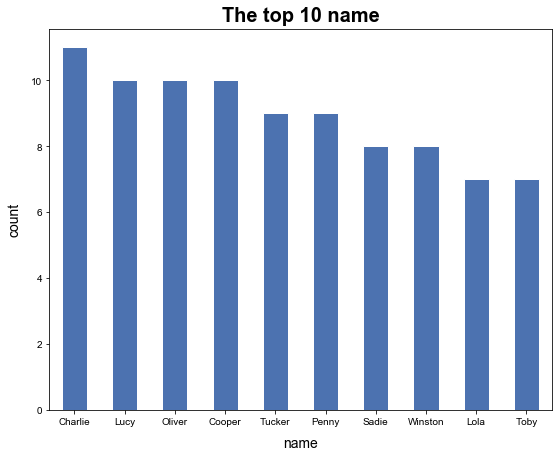

In [135]:
# Create a bar chart for the top 10 names 
set_label('The top 10 name','Name','count','white')
df.groupby('name').count()['tweet_id'].sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.xticks(rotation=360);

**Observation:** As is shown the bar chart, the most used name was Charlie.

###  2. What is the most dog type ?

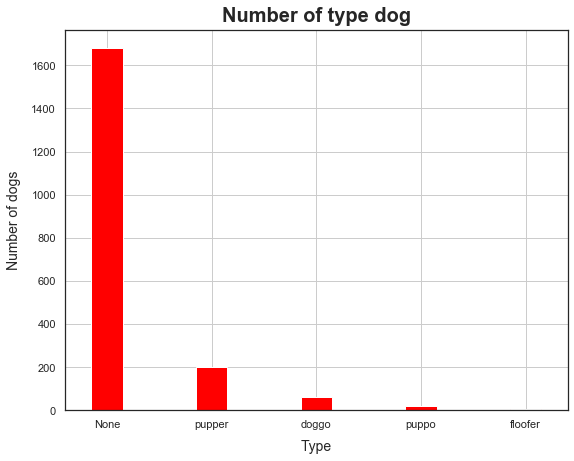

In [136]:
# Create a Bar chart for dog type
set_label('Number of type dog','Type','Number of dogs','whitegrid')
df['dog_type'].value_counts().plot.bar(width=0.3,color=['red'])
plt.xticks(rotation=360);

**Observation:** As is shown the bar chart, most of the dogs are unknown could be different type or not registered. But for the types we already known in the fisrt place is pupper.

### 3. What is rating for these dogs in the dataset?

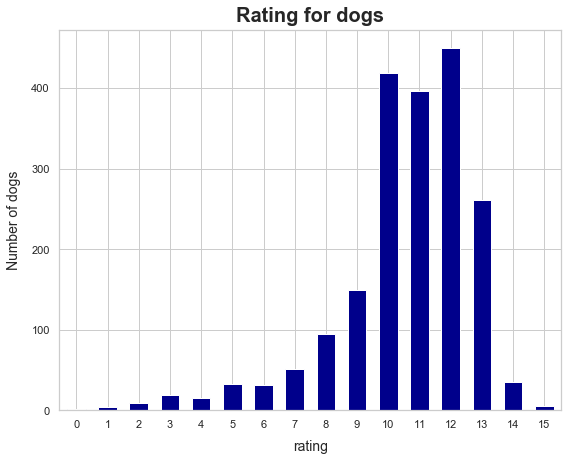

In [137]:
set_label('Rating for dogs','rating','Number of dogs','whitegrid')
df['rating_numerator'].value_counts().sort_index().plot.bar(width=0.6,color=['darkblue'])
plt.xticks(rotation=360);

**Observation:** As is shown the bar chart, most of the dogs rated with 12.

### 4. What is the percentage of retweet and favorite for these dogs?

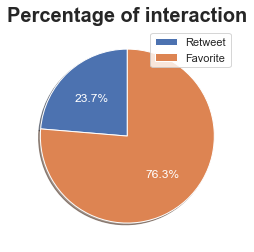

In [138]:
ret = df['retweet_count'].sum()
fav = df['favorite_count'].sum()

fig1, ax1 = plt.subplots()
ax1.pie([ret,fav], labels=['Retweet','Favorite'], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'color':'white'})
plt.title('Percentage of interaction', y=1, fontsize=20, fontweight='bold');
plt.legend()
plt.show();

**Observation:** As is shown the pie chart, most of the users used favorite rather than retween considering that the user can use both of them in one tweet.

### 5. What is the highest retweet tweet in the dataset?

In [139]:
max_retweet = df['retweet_count'].idxmax()
max_details = pd.DataFrame(df.loc[max_retweet])

pd.concat([max_details], axis=1)

,772
tweet_id,744234799360020481
timestamp,2016-06-18 18:26:18
source,iPhone
text,Here's a doggo realizing you can stand in a po...
expanded_urls,https://twitter.com/dog_rates/status/744234799...
rating_numerator,13
rating_denominator,10
name,NaN
retweet_count,79515
favorite_count,131075


**Observation:** As is shown result,the most tweet have retweet was (744234799360020481) and that tweet came from iPhone and have rating 13 and the dog type was doggo with 79515 retweet and 131075 favorite.

### 6. What is the highest favorite tweet in the dataset?

In [140]:
max_retweet = df['favorite_count'].idxmax()
max_details = pd.DataFrame(df.loc[max_retweet])

pd.concat([max_details], axis=1)

,309
tweet_id,822872901745569793
timestamp,2017-01-21 18:26:02
source,iPhone
text,Here's a super supportive puppo participating ...
expanded_urls,https://twitter.com/dog_rates/status/822872901...
rating_numerator,13
rating_denominator,10
name,NaN
retweet_count,48265
favorite_count,132810


**Observation:** As is shown result,the most tweet have favorite was (822872901745569793) and that tweet came from iPhone and have rating 13 and the dog type was puppo with 48265 retweet and 132810 favorite.

## Insights

* The most used name was 'Charlie'
* The most type registered in dataset was 'pupper'
* Most of the dogs get rated '12'
* The highest rewteet tweet got 79515 retweet
* The highest favorite tweet got 132810 favorite